In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from PIL import Image


In [2]:
#DATAFRAME bring all the data togather 
Data = pd.read_csv('combined_image_label_dataset.csv')
Data

,patient_name,path,histo_label,global_id
0,B1_0,0_001.Jpg,1,0
1,B1_0,0_002.Jpg,1,1
2,B1_0,0_003.Jpg,1,2
3,B1_0,0_004.Jpg,1,3
4,B1_0,0_005.Jpg,1,4
...,...,...,...,...
8495,B2_241,241_019_180801.Jpg,1,8495
8496,B2_241,241_020_180801.Jpg,1,8496
8497,B2_241,241_021_180801.Jpg,1,8497
8498,B2_241,241_022_180801.Jpg,1,8498


In [3]:
dataframe1=pd.read_excel('histo_label_0.xlsx')
dataframe1

,patient_name,path,histo_label,global_id
0,B1_1,1_001.Jpg,0,6
1,B1_1,1_002.Jpg,0,7
2,B1_1,1_003.Jpg,0,8
3,B1_1,1_004.Jpg,0,9
4,B1_1,1_005.Jpg,0,10
...,...,...,...,...
2990,B2_240,240_007_182509.Jpg,0,8480
2991,B2_240,240_008_182509.Jpg,0,8481
2992,B2_240,240_009_182509.Jpg,0,8482
2993,B2_240,240_010_182509.Jpg,0,8483


In [4]:
dataframe2=pd.read_excel('histo_label_1.xlsx')
dataframe2

,patient_name,path,histo_label,global_id
0,B1_0,0_001.Jpg,1,0
1,B1_0,0_002.Jpg,1,1
2,B1_0,0_003.Jpg,1,2
3,B1_0,0_004.Jpg,1,3
4,B1_0,0_005.Jpg,1,4
...,...,...,...,...
5500,B2_241,241_019_180801.Jpg,1,8495
5501,B2_241,241_020_180801.Jpg,1,8496
5502,B2_241,241_021_180801.Jpg,1,8497
5503,B2_241,241_022_180801.Jpg,1,8498


In [5]:
image_folder2 = "C:/Users/nalla/OneDrive/ドキュメント/Research data sets/dataset"

# List all .JPG or .jpg files
image_paths2 = [
    os.path.join(image_folder2, file)
    for file in os.listdir(image_folder2)
    if file.lower().endswith('.jpg')
]

print(f"Total images found: {len(image_paths2)}")

# List to store all image arrays
image_data2 = []
valid_path2=[]

# Loop through all images
for idx, path in enumerate(image_paths2):
    try:
        img = Image.open(path).convert('RGB')  
        img_resized = img.resize((224, 224))   
        img_array = np.array(img_resized)      
        image_data2.append(img_array)           
        valid_path2.append(os.path.basename(path))
        
        # Progress check every 500 images
        if (idx + 1) % 500 == 0:
            print(f"{idx + 1} images loaded...")

    except Exception as e:
        print(f"Error loading {path}: {e}")

# Convert list to NumPy array
image_data2 = np.array(image_data2)

print(f"\n✅ All images loaded and stored! Shape: {image_data2.shape}")



Total images found: 8508
500 images loaded...
1000 images loaded...
1500 images loaded...
2000 images loaded...
2500 images loaded...
3000 images loaded...
3500 images loaded...
4000 images loaded...
4500 images loaded...
5000 images loaded...
5500 images loaded...
6000 images loaded...
6500 images loaded...
7000 images loaded...
7500 images loaded...
8000 images loaded...
8500 images loaded...

✅ All images loaded and stored! Shape: (8508, 224, 224, 3)


In [6]:
import os
import numpy as np
import pandas as pd
import unicodedata
from collections import Counter

# === 1. Helper to normalize filenames ===
def clean_filename(p):
    name = os.path.basename(p)
    name = unicodedata.normalize('NFKC', name).strip().lower()  # Normalize unicode + lowercase
    name = os.path.splitext(name)[0] + '.jpg'  # Force .jpg extension
    return name

# === 2. Combine image arrays and paths ===
all_images =  image_data2
valid_paths =  valid_path2

# === 3. Normalize valid image filenames ===
valid_filenames = [clean_filename(p) for p in valid_paths]

# === 4. Normalize DataFrame path column ===
dataframe1['path'] = dataframe1['path'].apply(clean_filename)

# === 5. Check for duplicates ===
dupes = [item for item, count in Counter(valid_filenames).items() if count > 1]
print(f"🔁 Duplicate filenames in valid_paths: {len(dupes)}")

# === 6. Create dict from filename → image ===
image_dict = dict(zip(valid_filenames, all_images))  # if duplicates exist, only last one is kept

# === 7. Filter and match DataFrame to available images ===
filtered_df = dataframe1[dataframe1['path'].isin(image_dict.keys())].reset_index(drop=True)
print(f"✅ Matched: {filtered_df.shape[0]} out of {dataframe1.shape[0]}")
filtered_images = [image_dict[clean_filename(p)] for p in filtered_df['path']]
image_data0 = np.array(filtered_images)  # This is a numpy array of images
labels0 = filtered_df['histo_label'].values 

# === 8. Debug unmatched entries ===
unmatched_paths = set(dataframe1['path']) - set(image_dict.keys())
if unmatched_paths:
    print(f"❌ Unmatched images: {len(unmatched_paths)}")
    print("Sample unmatched:", list(unmatched_paths)[:10])
    

    
dataframe2['path'] = dataframe2['path'].apply(clean_filename)

# === 5. Check for duplicates ===
dupes = [item for item, count in Counter(valid_filenames).items() if count > 1]
print(f"🔁 Duplicate filenames in valid_paths: {len(dupes)}")

# === 6. Create dict from filename → image ===
image_dict = dict(zip(valid_filenames, all_images))  # if duplicates exist, only last one is kept

# === 7. Filter and match DataFrame to available images ===
filtered_df1 = dataframe2[dataframe2['path'].isin(image_dict.keys())].reset_index(drop=True)
print(f"✅ Matched: {filtered_df1.shape[0]} out of {dataframe2.shape[0]}")
filtered_images2 = [image_dict[clean_filename(p)] for p in filtered_df1['path']]
image_data1 = np.array(filtered_images2)  # This is a numpy array of images
labels1 = filtered_df1['histo_label'].values 


# === 8. Debug unmatched entries ===
unmatched_paths = set(dataframe2['path']) - set(image_dict.keys())
if unmatched_paths:
    print(f"❌ Unmatched images: {len(unmatched_paths)}")
    print("Sample unmatched:", list(unmatched_paths)[:10])
    
combined_dataset0 = list(zip(image_data0, labels0)) 
combined_dataset1 = list(zip(image_data1, labels1)) 

🔁 Duplicate filenames in valid_paths: 0
✅ Matched: 2214 out of 2995
❌ Unmatched images: 781
Sample unmatched: ['277_016.jpg', '277_022.jpg', '511_018.jpg', '477_019.jpg', '304_019.jpg', '49_013.jpg', '520_010.jpg', '226_008.jpg', '576_009.jpg', '275_009.jpg']
🔁 Duplicate filenames in valid_paths: 0
✅ Matched: 3679 out of 5505
❌ Unmatched images: 1826
Sample unmatched: ['490_031.jpg', '461_008.jpg', '578_026.jpg', '591_013.jpg', '219_014.jpg', '254_036.jpg', '434_009.jpg', '259_010.jpg', '596_069.jpg', '237_013.jpg']


In [7]:

df_combined0 = pd.DataFrame(combined_dataset0, columns=['image', 'label'])
df_combined1 = pd.DataFrame(combined_dataset1, columns=['image', 'label'])



In [65]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from torchvision import transforms
from PIL import Image
import numpy as np

# Step 2: Convert to a DataFrame
df_combined0 = pd.DataFrame(combined_dataset0, columns=['image', 'label'])
assert df_combined0['image'].isnull().sum() == 0, "Some images are None!"

# Step 4: Define the transform
your_transform_here = transforms.Compose([
    transforms.ToPILImage(),  # Convert numpy array to PIL Image
    transforms.Resize((224, 224)),  # Resize image
    transforms.ToTensor()  # For grayscale; change for RGB
])

# Step 5: Define the custom Dataset class
class ImageDatasetFromDataFrame(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        image = self.dataframe.iloc[idx]['image']
        label = self.dataframe.iloc[idx]['label']

        if isinstance(image, np.ndarray) and self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.long)

# Step 6: Instantiate the Dataset
custom_dataset0 = ImageDatasetFromDataFrame(df_combined0, transform=your_transform_here)

# Step 7: Try sampling
sample_image, sample_label = custom_dataset0[0]
print(f"✅ Sample loaded: image shape = {sample_image.shape}, label = {sample_label}")


✅ Sample loaded: image shape = torch.Size([3, 224, 224]), label = 0


In [9]:

df_combined1 = pd.DataFrame(combined_dataset1, columns=['image', 'label'])
assert df_combined0['image'].isnull().sum() == 0, "Some images are None!"
your_transform_here = transforms.Compose([
    transforms.ToPILImage(),  
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.5], std=[0.5]) 
])
class ImageDatasetFromDataFrame(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        image = self.dataframe.iloc[idx]['image']
        label = self.dataframe.iloc[idx]['label']

        if isinstance(image, np.ndarray) and self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.long)


custom_dataset1 = ImageDatasetFromDataFrame(df_combined1, transform=your_transform_here)
sample_image, sample_label = custom_dataset1[0]
print(f"✅ Sample loaded: image shape = {sample_image.shape}, label = {sample_label}")


✅ Sample loaded: image shape = torch.Size([3, 224, 224]), label = 1


In [66]:
from torch.utils.data import random_split

# Total size of custom_dataset
total_size = len(custom_dataset0)

# Define split ratios
splits = {
    '60-20-20': [0.6, 0.2, 0.2],
    '70-15-15': [0.7, 0.15, 0.15],
    '65-15-20': [0.65, 0.15, 0.2],
    '75-15-10': [0.75, 0.15, 0.1],
    '80-10-10': [0.8, 0.1, 0.1],
}

# Choose a split
split = splits['70-15-15']

# Compute split lengths
train_len = int(split[0] * total_size)
val_len = int(split[1] * total_size)
test_len = total_size - train_len - val_len

# Apply random_split to your custom PyTorch dataset
train_set_0, val_set_0, test_set_0 = random_split(custom_dataset0, [train_len, val_len, test_len])

print(f"✅ Split done — Train: {len(train_set_0)}, Validation: {len(val_set_0)}, Test: {len(test_set_0)}")


✅ Split done — Train: 1549, Validation: 332, Test: 333


In [67]:
from torch.utils.data import random_split

# Total size of custom_dataset
total_size = len(custom_dataset1)

# Define split ratios
splits = {
    '60-20-20': [0.6, 0.2, 0.2],
    '70-15-15': [0.7, 0.15, 0.15],
    '65-15-20': [0.65, 0.15, 0.2],
    '75-15-10': [0.75, 0.15, 0.1],
    '80-10-10': [0.8, 0.1, 0.1],
}

# Choose a split
split = splits['70-15-15']

# Compute split lengths
train_len = int(split[0] * total_size)
val_len = int(split[1] * total_size)
test_len = total_size - train_len - val_len

# Apply random_split to your custom PyTorch dataset
train_set_1, val_set_1, test_set_1 = random_split(custom_dataset1, [train_len, val_len, test_len])

print(f"✅ Split done — Train: {len(train_set_1)}, Validation: {len(val_set_1)}, Test: {len(test_set_1)}")


✅ Split done — Train: 2575, Validation: 551, Test: 553


In [68]:
train_set=train_set_0 +train_set_1
test_set= test_set_0+test_set_1
val_set=val_set_0+val_set_1

In [69]:
from torchvision import transforms

# For training (with augmentations)
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
     transforms.ColorJitter(brightness=0.5, contrast=0.5)  # For grayscale
])

# For validation/test (no augmentations)
test_val_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])


In [70]:
# Assuming you used: train_set, val_set, test_set = random_split(custom_dataset, [...])

# Apply transforms correctly
train_set_0.dataset.transform = train_transform
val_set_0.dataset.transform = test_val_transform
test_set_0.dataset.transform = test_val_transform
train_set_1.dataset.transform = train_transform
val_set_1.dataset.transform = test_val_transform
test_set_1.dataset.transform = test_val_transform


In [71]:
# Check the number of elements in each dataset


In [72]:
augmented_train_set=train_set_0+train_set_1
combined_val=val_set_0+val_set_1
combined_test=test_set_0+test_set_1




In [73]:
aug_images = []
aug_labels = []

for img, label in augmented_train_set:
    aug_images.append(img)
    aug_labels.append(label)
print(f"Images: {len(aug_images)}, Labels: {len(aug_labels)}")

Images: 4124, Labels: 4124


In [74]:
augmented_df = pd.DataFrame({
    'image': aug_images,
    'label': aug_labels
})
augmented_df.head()

,image,label
0,"[[[tensor(-0.5529), tensor(-0.5686), tensor(-0...",tensor(0)
1,"[[[tensor(-0.9608), tensor(-0.8902), tensor(-0...",tensor(0)
2,"[[[tensor(-0.9529), tensor(-0.8980), tensor(-0...",tensor(0)
3,"[[[tensor(-0.8902), tensor(-0.7176), tensor(-0...",tensor(0)
4,"[[[tensor(-0.8196), tensor(-0.6706), tensor(-0...",tensor(0)


In [75]:
# Assuming ImageDatasetFromDataFrame is already defined and can accept the DataFrame
augmented_dataset = ImageDatasetFromDataFrame(augmented_df, transform=train_transform)




In [76]:
train_df0, test_df0 = train_test_split(df_combined0, test_size=0.2, shuffle=True)
train_set0 = ImageDatasetFromDataFrame(train_df0, transform=your_transform_here)
test_image0=test_df0['image']
test_label0=test_df0['label']
test_labels0= test_label0.to_frame(name='label')


In [77]:
train_df1, test_df1 = train_test_split(df_combined1, test_size=0.2, shuffle=True)
train_set1 = ImageDatasetFromDataFrame(train_df1, transform=your_transform_here)
test_image1=test_df1['image']
test_label1=test_df1['label']
test_labels1 = test_label1.to_frame(name='label')




In [124]:
from torch.utils.data import ConcatDataset
final_train=ConcatDataset([augmented_dataset,train_set0,train_set1])
final_test_images= pd.concat([test_image0,test_image1])
final_test_labels=pd.concat([test_labels0,test_labels1])
# If your labels are Series



len(final_train)
print(final_train)
type(final_test_images)
print(final_test_images)

858     [[[4, 138, 143], [15, 115, 108], [31, 133, 136...
875     [[[6, 138, 140], [13, 120, 117], [11, 121, 120...
532     [[[6, 138, 140], [13, 120, 117], [11, 121, 120...
855     [[[6, 139, 144], [12, 111, 105], [18, 120, 122...
708     [[[8, 128, 127], [13, 108, 107], [12, 110, 109...
                              ...                        
2239    [[[15, 26, 36], [14, 26, 36], [13, 26, 35], [1...
1432    [[[6, 132, 132], [13, 115, 113], [17, 125, 124...
2080    [[[7, 148, 155], [28, 137, 127], [29, 129, 132...
963     [[[5, 147, 158], [11, 133, 122], [19, 137, 139...
2118    [[[6, 138, 140], [13, 121, 118], [11, 121, 120...
Name: image, Length: 1179, dtype: object


In [79]:
# Access total length
len(final_train)

# Get an item (image, label pair)
image, label = final_train[0]

# Loop through it
for img, lbl in final_train:
    print(type(img), lbl)
    break


<class 'torch.Tensor'> tensor(0)


C:\Users\nalla\AppData\Local\Temp\ipykernel_20720\645589346.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return image, torch.tensor(label, dtype=torch.long)


In [80]:
for i, ds in enumerate(final_train.datasets):
    if hasattr(ds, 'dataframe') and 'label' in ds.dataframe.columns:
        print(f"Dataset {i} ✅ has labels.")
    else:
        print(f"Dataset {i} ❌ missing labels.")


Dataset 0 ✅ has labels.
Dataset 1 ✅ has labels.
Dataset 2 ✅ has labels.


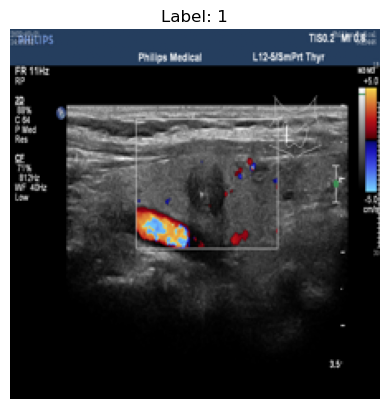

In [90]:
sample_image, sample_label = final_train[8025]  # This returns image, label tuple
sample_image = sample_image.permute(1, 2, 0)  # Convert from [C,H,W] to [H,W,C]
plt.imshow(sample_image)
plt.title(f"Label: {sample_label}")
plt.axis("off")
plt.show()


In [82]:
if isinstance(final_test_labels, pd.Series):
    final_test_labels = final_test_labels.to_frame()  # Converts Series to DataFrame
    final_test_labels.columns = ['label']  # Ensure correct column name

final_test_labels=ImageDatasetFromDataFrame(final_test_labels, transform=your_transform_here)
print(final_test_labels) 

In [83]:
print(type(final_test_labels))
print(dir(final_test_labels))




<class '__main__.ImageDatasetFromDataFrame'>
['__add__', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_is_protocol', 'dataframe', 'transform']


In [84]:
# Access the dataframe directly from the dataset object
df = getattr(final_test_labels, 'dataframe', None)
print(df)
# Check if it is a DataFrame and contains the 'label' column
if isinstance(df, pd.DataFrame) and 'label' in df.columns:
    print("✅ Test set has labels.")
else:
    print("❌ Missing labels or not a DataFrame.")

      label
858       0
875       0
532       0
855       0
708       0
...     ...
2239      1
1432      1
2080      1
963       1
2118      1

[1179 rows x 1 columns]
✅ Test set has labels.


C:\Users\nalla\AppData\Local\Temp\ipykernel_20720\645589346.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return image, torch.tensor(label, dtype=torch.long)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to 

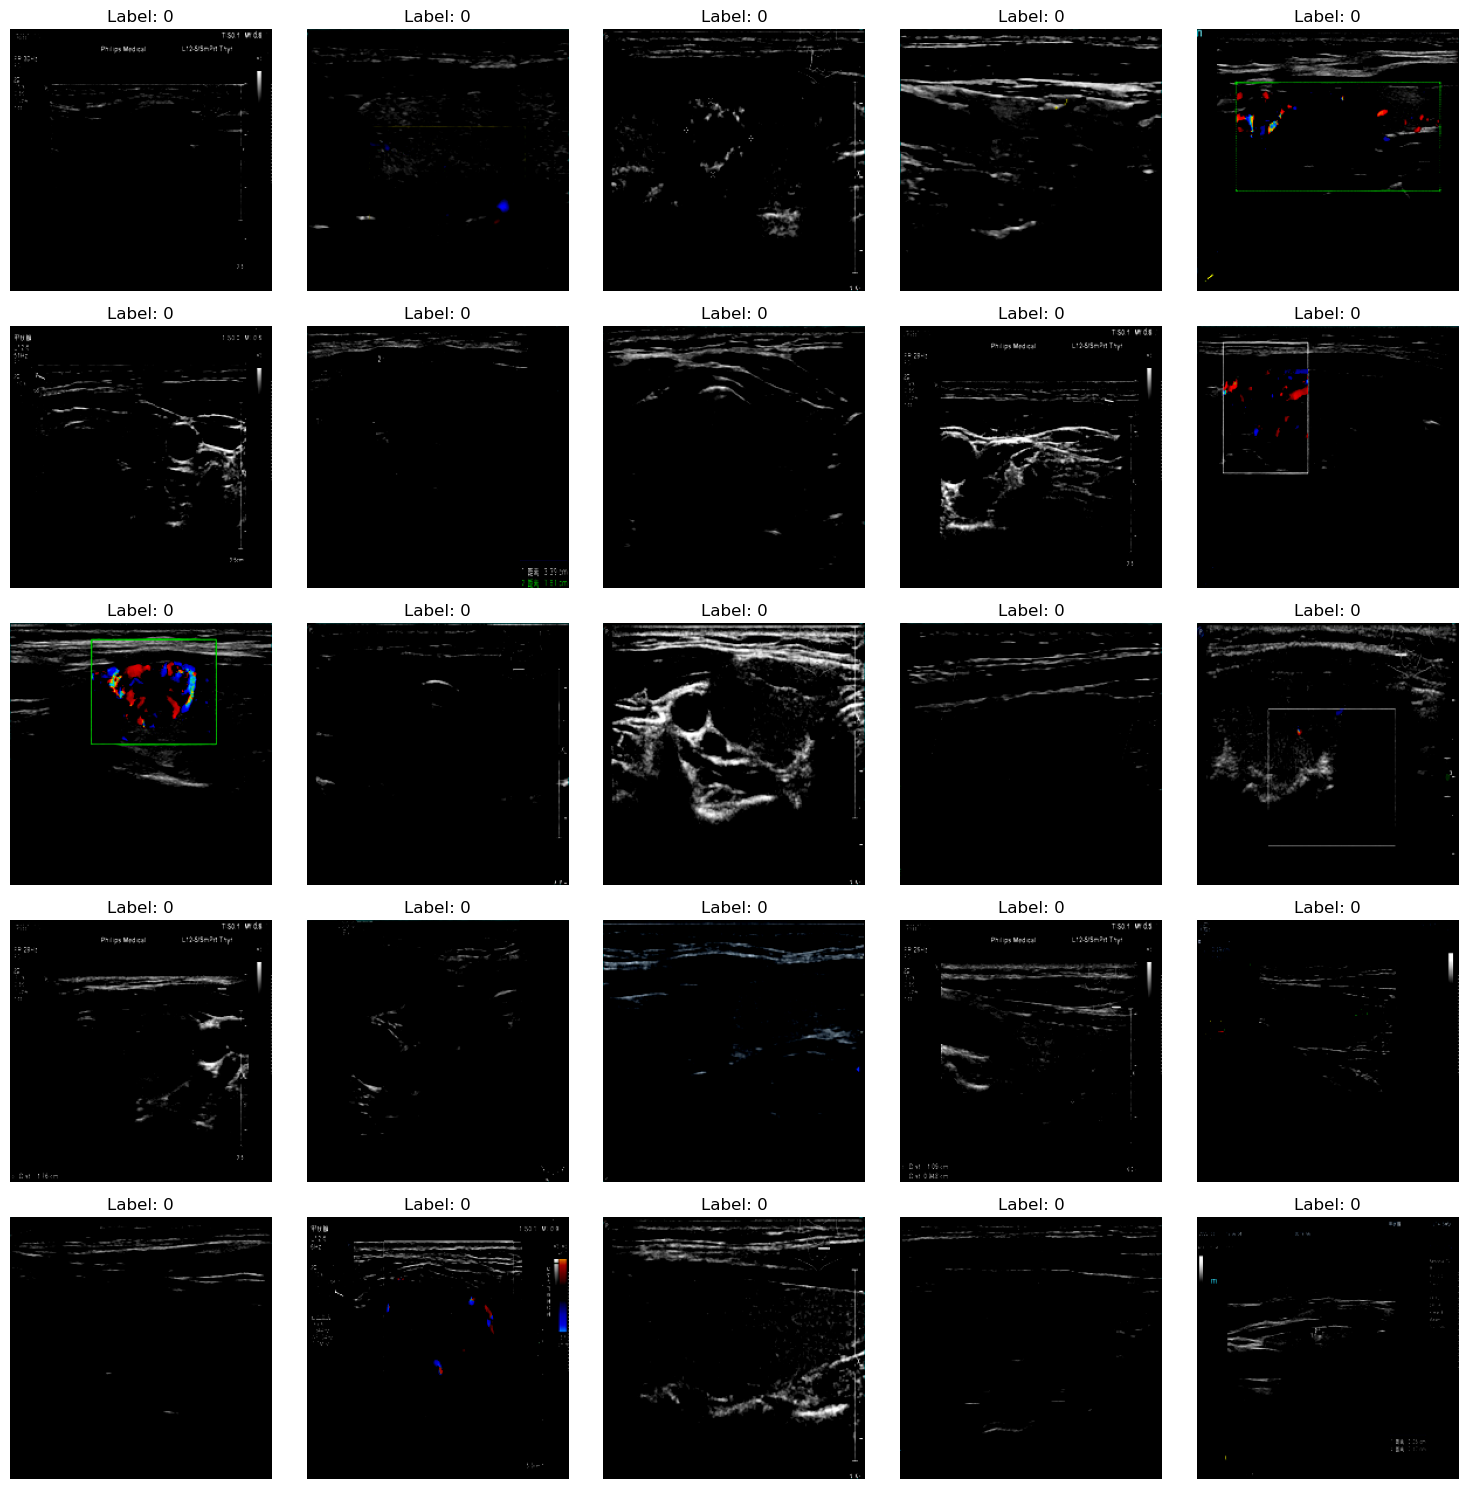

In [87]:
def show_images(dataset, start=50, batch_size=25):
    plt.figure(figsize=(15, 15))
    for i in range(start, min(start + batch_size, len(dataset))):
        img, label = dataset[i]
        img = img.permute(1, 2, 0)  # [C,H,W] → [H,W,C]
        
        plt.subplot(5, 5, i - start + 1)
        plt.imshow(img)
        plt.title(f"Label: {label}")
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Example: show first 25 images
show_images(augmented_dataset, start=0)

In [93]:
import numpy as np

# Assuming final_train and combined_val are PyTorch datasets (e.g., ConcatDataset)

# Function to convert PyTorch dataset to numpy arrays
def dataset_to_numpy(dataset):
    images = []
    labels = []
    for img, label in dataset:
        images.append(img.numpy())  # Convert tensor to numpy array
        labels.append(label.numpy())
    return np.array(images), np.array(labels)

# Convert PyTorch datasets to numpy arrays
X_train, y_train = dataset_to_numpy(final_train)
X_val, y_val = dataset_to_numpy(combined_val)

# Now X_train, y_train, X_val, and y_val are numpy arrays compatible with Keras


C:\Users\nalla\AppData\Local\Temp\ipykernel_20720\645589346.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return image, torch.tensor(label, dtype=torch.long)


In [95]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
X_train = np.transpose(X_train, (0, 2, 3, 1))  # From (batch_size, 3, 224, 224) to (batch_size, 224, 224, 3)
X_val = np.transpose(X_val, (0, 2, 3, 1))  # Same for validation set


# Train the model using numpy arrays
history = model.fit(
    X_train, y_train,  # Using numpy arrays
    validation_data=(X_val, y_val),  # Validation data in numpy format
    epochs=10,
    batch_size=32
)


Epoch 1/10


277/277 [==============================] - 157s 557ms/step - loss: 0.6846 - accuracy: 0.6199 - val_loss: 0.6565 - val_accuracy: 0.6240
Epoch 2/10
277/277 [==============================] - 130s 469ms/step - loss: 0.6482 - accuracy: 0.6265 - val_loss: 0.6408 - val_accuracy: 0.6285
Epoch 3/10
277/277 [==============================] - 129s 466ms/step - loss: 0.6028 - accuracy: 0.6673 - val_loss: 0.5527 - val_accuracy: 0.6886
Epoch 4/10
277/277 [==============================] - 128s 462ms/step - loss: 0.5097 - accuracy: 0.7376 - val_loss: 0.4677 - val_accuracy: 0.7758
Epoch 5/10
277/277 [==============================] - 128s 463ms/step - loss: 0.3741 - accuracy: 0.8181 - val_loss: 0.3910 - val_accuracy: 0.8369
Epoch 6/10
277/277 [==============================] - 132s 478ms/step - loss: 0.2565 - accuracy: 0.8874 - val_loss: 0.3018 - val_accuracy: 0.8720
Epoch 7/10
277/277 [==============================] - 126s 456ms/step - loss: 0.1742 - accuracy: 0.9249 - val_loss: 0.2783

In [125]:
import cv2  # OpenCV for resizing images

# Resize each image to (224, 224, 3)
final_test_images = [cv2.resize(img, (224, 224)) for img in final_test_images]
final_test_images = np.array(final_test_images)
final_test_labels = np.array(final_test_labels)
# Check the shape
print(final_test_images.shape)  # Should be (num_samples, 224, 224, 3)


(1179, 224, 224, 3)


In [127]:
print(type(final_test_images))
print(final_test_images.shape)

<class 'numpy.ndarray'>
(1179, 224, 224, 3)


In [128]:
# Ensure the images are of type float32
final_test_images = final_test_images.astype('float32')

# Predict
y_pred = (model.predict(final_test_images) > 0.5).astype("int32")

# Classification report
print("Test Classification Report:")
print(classification_report(final_test_labels, y_pred))


37/37 [==============================] - 4s 100ms/step
Test Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       443
           1       0.83      0.86      0.84       736

    accuracy                           0.80      1179
   macro avg       0.79      0.78      0.79      1179
weighted avg       0.80      0.80      0.80      1179



In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
history = model.fit(
    final_train
    validation_data=(combined_val),
    epochs=10,
    batch_size=32
)

# 6. Evaluate
y_pred = (model.predict(X_val) > 0.5).astype("int32")
print(classification_report(y_val, y_pred))






Epoch 1/10


148/148 [==============================] - 77s 501ms/step - loss: 0.6809 - accuracy: 0.6162 - val_loss: 0.6599 - val_accuracy: 0.6243
Epoch 2/10
148/148 [==============================] - 71s 481ms/step - loss: 0.6578 - accuracy: 0.6262 - val_loss: 0.6445 - val_accuracy: 0.6387
Epoch 3/10
148/148 [==============================] - 72s 484ms/step - loss: 0.6244 - accuracy: 0.6525 - val_loss: 0.6146 - val_accuracy: 0.6701
Epoch 4/10
148/148 [==============================] - 74s 497ms/step - loss: 0.5938 - accuracy: 0.6712 - val_loss: 0.5954 - val_accuracy: 0.6641
Epoch 5/10
148/148 [==============================] - 72s 490ms/step - loss: 0.5481 - accuracy: 0.7098 - val_loss: 0.5898 - val_accuracy: 0.6777
Epoch 6/10
148/148 [==============================] - 72s 488ms/step - loss: 0.5015 - accuracy: 0.7425 - val_loss: 0.6130 - val_accuracy: 0.6862
Epoch 7/10
148/148 [==============================] - 70s 472ms/step - loss: 0.4516 - accuracy: 0.7650 - val_loss: 0.6303 - 

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. Normalize image data (0-1)
X = X.astype('float32') / 255.0

# 2. Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

# 6. Evaluate
y_pred = (model.predict(X_val) > 0.5).astype("int32")
print(classification_report(y_val, y_pred))


Epoch 1/10
129/129 [==============================] - 79s 586ms/step - loss: 0.6709 - accuracy: 0.6177 - val_loss: 0.6641 - val_accuracy: 0.6244
Epoch 2/10
129/129 [==============================] - 72s 558ms/step - loss: 0.6641 - accuracy: 0.6242 - val_loss: 0.6627 - val_accuracy: 0.6244
Epoch 3/10
129/129 [==============================] - 67s 523ms/step - loss: 0.6655 - accuracy: 0.6242 - val_loss: 0.6619 - val_accuracy: 0.6244
Epoch 4/10
129/129 [==============================] - 65s 503ms/step - loss: 0.6636 - accuracy: 0.6242 - val_loss: 0.6640 - val_accuracy: 0.6244
Epoch 5/10
129/129 [==============================] - 68s 525ms/step - loss: 0.6631 - accuracy: 0.6242 - val_loss: 0.6621 - val_accuracy: 0.6244
Epoch 6/10
129/129 [==============================] - 66s 510ms/step - loss: 0.6644 - accuracy: 0.6242 - val_loss: 0.6619 - val_accuracy: 0.6244
Epoch 7/10
129/129 [==============================] - 69s 535ms/step - loss: 0.6638 - accuracy: 0.6242 - val_loss: 0.6619 - val_ac

C:\Users\nalla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nalla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nalla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. Normalize image data (0-1)
X = X.astype('float32') / 255.0

# 2. Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# 3. Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

# 6. Evaluate
y_pred = (model.predict(X_val) > 0.5).astype("int32")
print(classification_report(y_val, y_pred))


Epoch 1/10
139/139 [==============================] - 80s 560ms/step - loss: 0.6710 - accuracy: 0.6230 - val_loss: 0.6658 - val_accuracy: 0.6242
Epoch 2/10
139/139 [==============================] - 72s 519ms/step - loss: 0.6668 - accuracy: 0.6243 - val_loss: 0.6620 - val_accuracy: 0.6242
Epoch 3/10
139/139 [==============================] - 72s 518ms/step - loss: 0.6666 - accuracy: 0.6243 - val_loss: 0.6624 - val_accuracy: 0.6242
Epoch 4/10
139/139 [==============================] - 70s 502ms/step - loss: 0.6657 - accuracy: 0.6243 - val_loss: 0.6620 - val_accuracy: 0.6242
Epoch 5/10
139/139 [==============================] - 71s 514ms/step - loss: 0.6627 - accuracy: 0.6243 - val_loss: 0.6624 - val_accuracy: 0.6242
Epoch 6/10
139/139 [==============================] - 70s 504ms/step - loss: 0.6645 - accuracy: 0.6243 - val_loss: 0.6623 - val_accuracy: 0.6242
Epoch 7/10
139/139 [==============================] - 71s 511ms/step - loss: 0.6639 - accuracy: 0.6243 - val_loss: 0.6620 - val_ac

C:\Users\nalla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nalla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nalla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# we created cnn models without spliting the data into malign or benign

now we split it into malign and benign

# Benign test train data

# implementing the model

In [30]:
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [31]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2

# --- Ensure environment stays on CPU ---
os.environ["CUDA_VISIBLE_DEVICES"] = ""  # Prevent CUDA use
torch.cuda.is_available = lambda: False  # Override check

# Set CPU device
device = torch.device('cpu')
print(f"Using device: {device}")

# Custom Dataset
class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None, root_dir=""):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
        self.root_dir = root_dir

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_name = self.image_paths.iloc[idx]  # Make sure these are pandas Series
        label = self.labels.iloc[idx]
        full_path = os.path.join(self.root_dir, img_name)
        image = Image.open(full_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label, full_path

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Example: Load your data — replace with your own DataFrame
# Assuming 'filtered_df' is already loaded with columns 'path' and 'histo_label'
root_dir = r"C:\Users\nalla\OneDrive\ドキュメント\Research data sets\dataset"
train_df, test_df = train_test_split(filtered_df, test_size=0.2, stratify=filtered_df['histo_label'], random_state=42)

# Datasets and Loaders
train_dataset = CustomDataset(train_df['path'], train_df['histo_label'], transform, root_dir)
test_dataset = CustomDataset(test_df['path'], test_df['histo_label'], transform, root_dir)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, pin_memory=False)

# Model Setup
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)
model = model.to(device)

# Optimizer *after* moving to CPU
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training
def train(model, loader, optimizer, criterion):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for images, labels, _ in loader:
        images, labels = images.to(device), labels.to(device)
        assert images.device.type == 'cpu' and labels.device.type == 'cpu'

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * images.size(0)
        _, preds = outputs.max(1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    return total_loss / total, 100 * correct / total

# Evaluation
def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels, _ in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = outputs.max(1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return 100 * correct / total

# Train Loop
for epoch in range(10):
    loss, acc = train(model, train_loader, optimizer, criterion)
    test_acc = evaluate(model, test_loader)
    print(f"Epoch {epoch+1} | Train Loss: {loss:.4f} | Train Acc: {acc:.2f}% | Test Acc: {test_acc:.2f}%")



Using device: cpu


C:\Users\nalla\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\nalla\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1 | Train Loss: 0.0516 | Train Acc: 97.01% | Test Acc: 100.00%
Epoch 2 | Train Loss: 0.0000 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 3 | Train Loss: 0.0000 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 4 | Train Loss: 0.0000 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 5 | Train Loss: 0.0000 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 6 | Train Loss: 0.0000 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 7 | Train Loss: 0.0000 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 8 | Train Loss: 0.0000 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 9 | Train Loss: 0.0000 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 10 | Train Loss: 0.0000 | Train Acc: 100.00% | Test Acc: 100.00%


# model is built and has predicted now we add explainability.


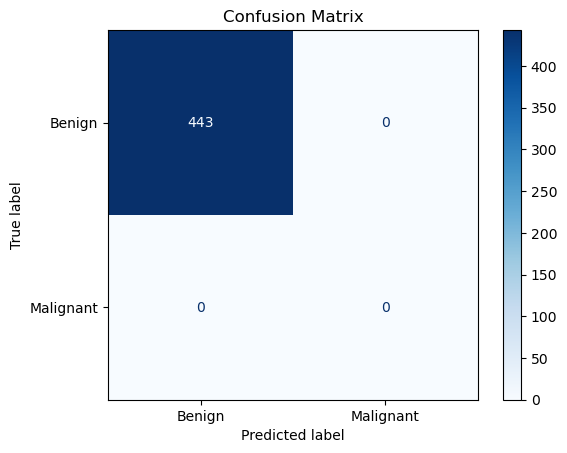

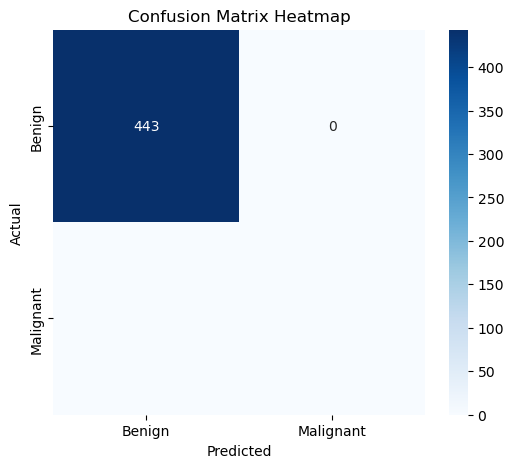

In [41]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Collect predictions and true labels
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels, _ in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = outputs.max(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds,labels=[0,1])

# 1. Confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 2. Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()




100%|████████████████████████████████████████████████████████████████████████████████| 443/443 [00:15<00:00, 29.14it/s]


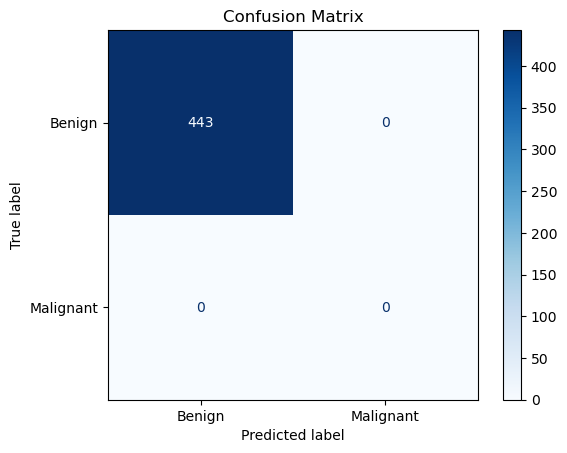

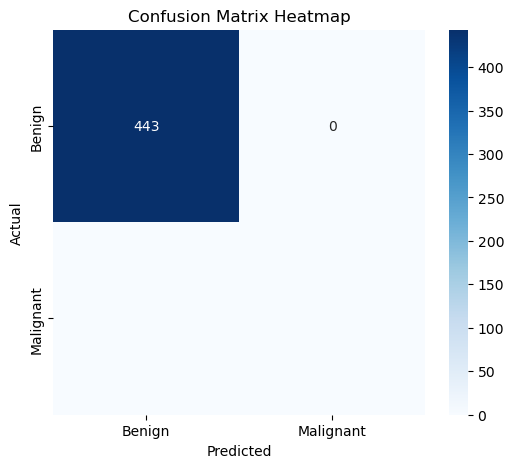

In [39]:
import torch
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from tqdm import tqdm

# Assuming device, model, and test_loader are defined
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels, _ in tqdm(test_loader):  # Adjust if 2 or 3 values
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute Confusion Matrix
cm = confusion_matrix(all_labels, all_preds,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Optional: Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [74]:
y_preds = []
y_true = []

model.eval()
with torch.no_grad():
    for images, labels, _ in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)
        y_preds.extend(preds.cpu().numpy())
        y_true.extend(labels.cpu().numpy())


In [75]:
# Grad-CAM
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook()

    def hook(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()
        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0].detach()
        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    def __call__(self, input_tensor, target_class=None):
        self.model.eval()
        output = self.model(input_tensor)
        if target_class is None:
            target_class = output.argmax().item()

        loss = output[0, target_class]
        self.model.zero_grad()
        loss.backward()

        pooled_grads = self.gradients.mean(dim=[0, 2, 3])
        cam = (pooled_grads[:, None, None] * self.activations[0]).sum(dim=0)

        cam = torch.relu(cam)
        cam -= cam.min()
        cam /= cam.max() + 1e-8  # Prevent division by zero
        cam = cam.cpu().numpy()
        cam = cv2.resize(cam, (224, 224))
        return cam

# Visualize Grad-CAM
def show_cam_on_image(img_path, cam):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    cam = np.uint8(255 * cam)
    heatmap = cv2.applyColorMap(cam, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)
    plt.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Run Grad-CAM
gradcam = GradCAM(model, model.layer4[1].conv2)
sample_img, _, img_path = next(iter(test_loader))
sample_img = sample_img.to(device)
cam = gradcam(sample_img)
show_cam_on_image(img_path[0], cam)


C:\Users\nalla\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer

        self.gradients = None
        self.activations = None

        # Hook for activations
        self.target_layer.register_forward_hook(self.save_activation)
        # Hook for gradients
        self.target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def generate(self, input_tensor, class_idx=None):
        self.model.eval()
        output = self.model(input_tensor)

        if class_idx is None:
            class_idx = output.argmax(dim=1).item()

        loss = output[:, class_idx]
        self.model.zero_grad()
        loss.backward()

        # Grad-CAM calculation
        gradients = self.gradients
        activations = self.activations
        b, k, u, v = gradients.size()

        alpha = gradients.view(b, k, -1).mean(2)
        weights = alpha.view(b, k, 1, 1)

        cam = (weights * activations).sum(1, keepdim=True)
        cam = torch.relu(cam)
        cam = cam.squeeze().cpu().numpy()

        # Normalize between 0-1
        cam = cam - np.min(cam)
        cam = cam / np.max(cam)
        return cam

def show_cam_on_image(img_tensor, cam):
    img = img_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy()
    img = np.uint8(255 * img)
    img = cv2.resize(img, (224, 224))

    cam = np.uint8(255 * cam)
    cam = cv2.resize(cam, (224, 224))  # make sure same size!
    cam = cv2.applyColorMap(cam, cv2.COLORMAP_JET)

    if len(img.shape) == 2:  # if img is grayscale, convert to 3 channels
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    overlay = cv2.addWeighted(cam, 0.5, img, 0.5, 0)
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()




In [ ]:
# Create GradCAM object
gradcam = GradCAM(model, model.layer4[-1])  # Example: last layer of ResNet

# Forward one sample
sample_img = sample_img.to(device)

# Generate Grad-CAM
cam = gradcam.generate(sample_img)


# Show the CAM overlay
show_cam_on_image(sample_img, cam)



In [ ]:
print(f"Shape of sample_img: {sample_img.shape}")


In [70]:
import cv2
import numpy as np
import torch
import torch.nn.functional as F

# Assuming `gradcam` is the Grad-CAM object initialized earlier.
# and `model` is the pre-trained model (e.g., ResNet).

# Ensure the sample image is on the correct device (GPU/CPU)
sample_img = sample_img.to(device)

# Check the input shape (must be [1, 3, 224, 224])
print(f"Input shape before passing to model: {sample_img.shape}")

# If the input has a single channel (1 channel), repeat to make it 3 channels
if sample_img.shape[1] == 9:  # If single channel (grayscale)
    sample_img = sample_img.resize(1, 3, 224, 224)  # Repeat to create 3 channels (RGB)

# Double check: Ensure the shape is now [1, 3, 224, 224]
print(f"Input shape after channel adjustment (if needed): {sample_img.shape}")

# Generate Grad-CAM
cam = gradcam.generate(sample_img)

# Convert to numpy arrays for overlay
img = sample_img[0].cpu().detach().numpy()  # Get the numpy array from tensor

# Ensure the image is in HWC format for OpenCV (height, width, channels)
img = np.transpose(img, (1, 2, 0))  # Convert from CHW to HWC
img = cv2.resize(img, (512, 512))  # Resize to match Grad-CAM size
cam = cv2.resize(cam, (512, 512))  # Resize Grad-CAM to match image size

# Normalize CAM to be between 0 and 255
cam = np.uint8(255 * cam / np.max(cam))

# Create an overlay
overlay = cv2.addWeighted(cam, 0.3, img, 0.7, 0)

# Show the CAM overlay
show_cam_on_image(sample_img[0], cam)  # Ensure this function is defined correctly


Input shape before passing to model: torch.Size([1, 9, 224, 224])


RuntimeError: requested resize to 1x3x224x224 (150528 elements in total), but the given tensor has a size of 1x9x224x224 (451584 elements). autograd's resize can only change the shape of a given tensor, while preserving the number of elements. 

In [36]:
from PIL import Image

def show_cam_on_image(img_path, cam):
    img = Image.open(img_path).convert("RGB")
    img = img.resize((224, 224))
    img = np.array(img)
    cam = np.uint8(255 * cam)
    heatmap = cv2.applyColorMap(cam, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)
    plt.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    


In [37]:
plt.show()

In [38]:
print(img_path[0])
print(os.path.exists(img_path[0]))
%matplotlib inline


C:\Users\nalla\OneDrive\ドキュメント\Research data sets\dataset\170_030_174751.jpg
True
